# Model Evaluation and hyperparameter Tuning

## 1. Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header= None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
from sklearn.preprocessing import LabelEncoder
X,y = df.iloc[:,2:].values,df.iloc[:,1].values
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

## 2. Pipeline

In [15]:
# StandardScaler,PCA,LR,Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('ss',StandardScaler()),('pca',PCA(n_components = 2)),('clf',LogisticRegression(random_state = 1))])
pipe_lr.fit(X_train,y_train)
print(pipe_lr.score(X_test,y_test))
print(pipe_lr.score(X_train,y_train))

0.9415204678362573
0.964824120603015


## 3. K-fold cross-validation

sensitive to how we partition the training set  
K default 10  
small datasets -- k larger  
large datasets -- k smaller  
Leave-one-out recommended with very small datasets


better choose: stratified k-fold cross-validation   


In [16]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator = pipe_lr,X = X_train, y = y_train,cv = 10,n_jobs = 1)

In [17]:
scores

array([0.975     , 0.975     , 0.925     , 0.925     , 0.975     ,
       1.        , 0.975     , 0.975     , 0.95      , 0.97368421])

## 4. Learning curve

### 4.1 Plot train and test error

In [19]:
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
pipe_lr = Pipeline([('scl',StandardScaler()),('clf',LogisticRegression(penalty='l2',random_state=0))])
train_sizes,train_scores,test_scores = learning_curve(estimator = pipe_lr,
                                                      X= X_train, y = y_train,train_sizes = np.linspace(0.1,1.0,10),
                                                      cv = 10,n_jobs = 1)

In [20]:
train_sizes

array([ 35,  71, 107, 143, 179, 214, 250, 286, 322, 358])

In [23]:
train_scores.shape

(10, 10)

In [24]:
test_scores.shape

(10, 10)

In [25]:
train_mean = np.mean(train_scores,axis = 1)
train_std = np.std(train_scores,axis = 1)
test_mean = np.mean(test_scores,axis = 1)
test_std = np.std(test_scores,axis =1)

In [29]:
train_sizes.shape

(10,)

In [30]:
train_mean.shape

(10,)

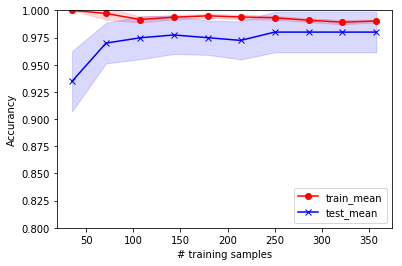

In [44]:
plt.plot(train_sizes,train_mean,color = 'red',marker = 'o',label = "train_mean")
plt.plot(train_sizes,test_mean,color = 'blue',marker = 'x',label = "test_mean")
plt.ylim([0.8,1])
plt.xlabel("# training samples")
plt.ylabel("Accurancy")
plt.legend(loc = "lower right")
plt.fill_between(train_sizes,train_mean + train_std,train_mean - train_std,color = 'red',alpha = 0.15)
plt.fill_between(train_sizes,test_mean + test_std,test_mean - test_std,color = 'blue',alpha = 0.15)


### 4.2 Addressing overfitting and underfitting with validation Curves

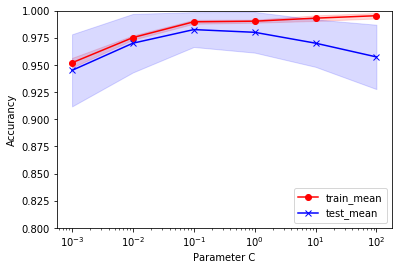

In [49]:
from sklearn.learning_curve import validation_curve
param_range = [0.001,0.01,0.1,1,10,100]
train_scores,test_scores = validation_curve(estimator = pipe_lr,
                                                      X= X_train, y = y_train,param_name = 'clf__C',
                                                        param_range = param_range,cv = 10)
train_mean = np.mean(train_scores,axis = 1)
train_std = np.std(train_scores,axis = 1)
test_mean = np.mean(test_scores,axis = 1)
test_std = np.std(test_scores,axis =1)

plt.plot(param_range,train_mean,color = 'red',marker = 'o',label = "train_mean")
plt.plot(param_range,test_mean,color = 'blue',marker = 'x',label = "test_mean")
plt.ylim([0.8,1])
plt.xscale('log')
plt.xlabel("Parameter C")
plt.ylabel("Accurancy")
plt.legend(loc = "lower right")
plt.fill_between(param_range,train_mean + train_std,train_mean - train_std,color = 'red',alpha = 0.15)
plt.fill_between(param_range,test_mean + test_std,test_mean - test_std,color = 'blue',alpha = 0.15)



### 4.3 Fine-tuning models via Grid Search

In [60]:
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
pipe_svc = Pipeline([('scl',StandardScaler()),('clf',SVC(random_state = 1))])
param_range = [0.001,0.01,0.1,1,10,100,1000]
param_grid = [{'clf__C':param_range,'clf__kernel':['linear']},
             {'clf__C':param_range,'clf__gamma':param_range,'clf__kernel':['rbf']}
             ]
gs = GridSearchCV(estimator = pipe_svc,param_grid = param_grid, scoring='accuracy',cv = 10,n_jobs = 1)
gs = gs.fit(X_train,y_train)
print(gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_)

{'clf__C': 0.1, 'clf__kernel': 'linear'}
0.9824120603015075
Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))])


In [61]:
clf = gs.best_estimator_

In [64]:
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

0.9590643274853801


## 5. Nested Corss-validation

Powerful method select among different machine learning algorithms  
Book: Bias in Error Estimation When Using Cross-validation for Model Selection

In [65]:
gs = GridSearchCV(estimator = pipe_svc,param_grid = param_grid, scoring='accuracy',cv = 5,n_jobs = -1)
scores = cross_val_score(gs,X,y,scoring='accuracy',cv = 5)
print(np.mean(scores),np.std(scores))

0.9771758368603308 0.004187979172310169


In [66]:
from sklearn.tree import DecisionTreeClassifier
param_grid = [{'max_depth':[1,2,3,4,5,6,7,None]}]
gs = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 0),param_grid = param_grid, scoring='accuracy',cv = 5)
scores = cross_val_score(gs,X_train,y_train,scoring="accuracy",cv = 5)
print(np.mean(scores),np.std(scores))

0.9322435897435897 0.01240115421660461


## 6. Performance evaluation metrics
### 6.1 Confusion matrix

In [68]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train,y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true = y_test,y_pred = y_pred)
print(confmat)


[[106   2]
 [  3  60]]


### 6.2 Precision / Recall / F1_score

In [72]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,f1_score

print(precision_score(y_true = y_test,y_pred = y_pred))
print(recall_score(y_true = y_test,y_pred = y_pred))
print(f1_score(y_true = y_test,y_pred = y_pred))

0.967741935483871
0.9523809523809523
0.96


In [75]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds  = precision_recall_curve(y_test,y_pred)

In [76]:
precision

array([0.36842105, 0.96774194, 1.        ])

In [77]:
recall

array([1.        , 0.95238095, 0.        ])

In [78]:
thresholds

array([0, 1])

### 6.3 ROC

Should Be Something More

# 7. Reference

Book: A study of Cross-validation and Bootstrap for Accuracy Estimation and Model Selection  
Book: Analysis of Variance of Cross-validation Estimators of the Generalization Error  
Book: Bias in Error Estimation When Using Cross-validation for Model Selection